In [1]:

from mmj_functions import *


In [2]:
exec(open("./funcs/mmj_kmeans_single_one_scom.py").read())

In [3]:

import kmedoids

In [4]:
random.seed(12647)
np.random.seed(12647)

In [5]:
test_data_145 = pickle.load(  open( "./data/test_data_145.p", "rb" ) ) 
true_K_145 =  pickle.load(  open( "./data/true_num_of_145.p", "rb" ) ) 
 
 

In [6]:
def MMJ_K_means_using_PAM_algo(X, num_clusters, mmj_matrix): 
    import kmedoids
    km_model = kmedoids.fasterpam(mmj_matrix, num_clusters)
    label = km_model.labels
    
    print("Loss is:", np.round(km_model.loss/len(X), 8) )

    centers_idx = [[ii] for ii in km_model.medoids]
    dis_to_medoids = np.array([[mmj_matrix[i,j] for j in km_model.medoids] for i in range(len(X))])
    min_dis_to_medoids = np.min(dis_to_medoids, axis = 1)

    strong_ambi_p_idx, weak_ambi_p_idx = [], []
    for i, _ in enumerate(dis_to_medoids):   
        ppp = np.sum(dis_to_medoids[i] == min_dis_to_medoids[i])
        if  ppp == 1:
            pass      
        elif ppp == num_clusters:
            strong_ambi_p_idx.append(i)      
        else:
            weak_ambi_p_idx.append(i)
     
    if strong_ambi_p_idx or weak_ambi_p_idx:
        plot_2D_or_3D_data_empty_circles_weak_strong_multi_one_scom(X, label,centers_idx, strong_ambi_p_idx, weak_ambi_p_idx)        
    else:
        plot_2D_or_3D_data(X, label, centers_idx = centers_idx, plot_center = 1)

In [7]:
data_id  = 106


X = test_data_145[data_id] 
 
num_clusters =  true_K_145[data_id] 

 

In [8]:
mmj_matrix =  cal_mmj_matrix_by_algo_4_Calculation_and_Copy(X) 
 
mmj_matrix_squared = mmj_matrix**2

Loss is: 0.48530449


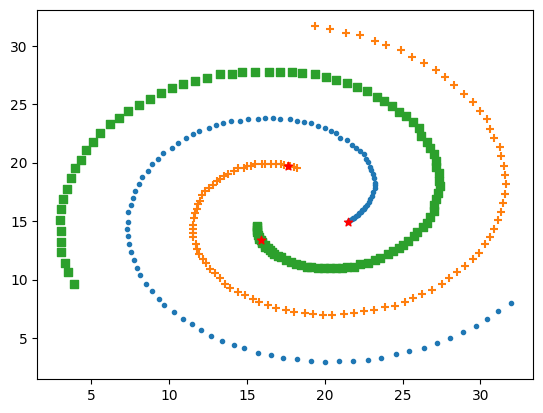

In [9]:
MMJ_K_means_using_PAM_algo(X, num_clusters, mmj_matrix_squared)



Got a better one! Loss is:  4.84650641
Got a better one! Loss is:  0.48530449
The single One-SCOM  of each cluster:  [[203], [103], [304]]


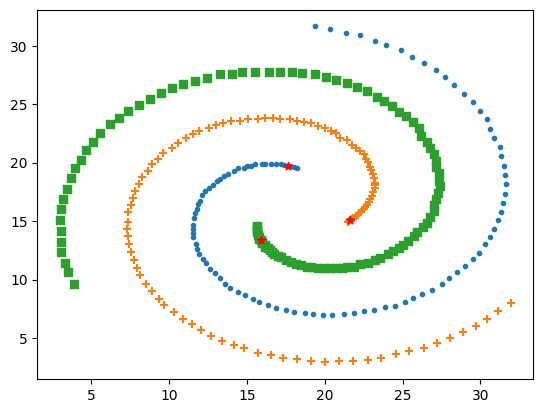

In [10]:
 
attempts = 20

label, centroids_idx, loss, strong_ambi_p_idx, weak_ambi_p_idx = \
KMeans_several_times_ambi_points_single_one_scom(X, num_clusters, attempts, mmj_matrix)

print("The single One-SCOM  of each cluster: ", centroids_idx)

if strong_ambi_p_idx or weak_ambi_p_idx:
    plot_2D_or_3D_data_empty_circles_weak_strong_multi_one_scom(X, label,centroids_idx, strong_ambi_p_idx, weak_ambi_p_idx)        
else:
    plot_2D_or_3D_data(X, label, centers_idx = centroids_idx, plot_center = 1)

In [11]:
# Note the two calculated losses are equal.
# The One-SCOM for each cluster can have multiple points, we can arbitrarily choose one or keep them all.

In [12]:
# One-SCOM means SCOM-of-length-one. SCOM stands for Semantic Center of Mass.  
# One-SCOM is the counterpart of center of mass or centroid on graph. See:
# https://arxiv.org/abs/2110.06043
    
